In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading the csv file

In [4]:
df=pd.read_csv('loan_prediction (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

# Highly cardinal columns must be dropped like loan_id column because it has unique values and not helpful for analysing trends

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.drop(['Loan_ID'],axis = 1, inplace = True)

# Checking duplicated values

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# checking for null values

In [10]:
df.isnull().sum()    

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Lets fill the null values for numerical and categorical columns with mean, median and mode whichever is suitable

In [11]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [12]:

df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [13]:
df['Gender'].fillna('Unknown', inplace =  True )

In [14]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
df['Married'].fillna('NA', inplace = True)

In [16]:
df['Dependents']=df['Dependents'].replace('3+','3')

In [17]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

In [18]:
df['Self_Employed'].fillna('NA', inplace = True)

In [19]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [20]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)

In [21]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [22]:
df["LoanAmount"].mean()

146.41216216216216

In [23]:
df["LoanAmount"].median()

128.0

In [24]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)

In [25]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
df.isnull().sum().sum()

0

# Lets check for outliers in Numerical columns important for data analysis

<Axes: ylabel='ApplicantIncome'>

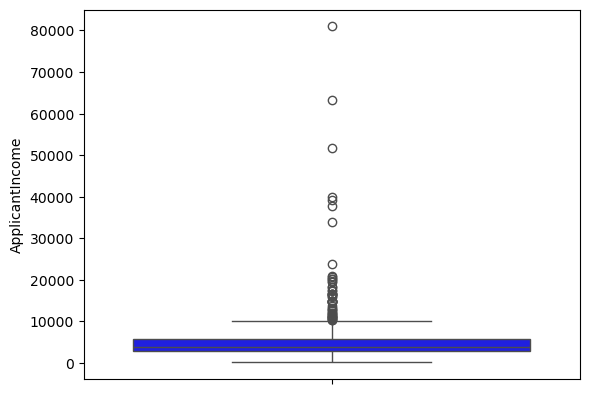

In [27]:
sns.boxplot(df['ApplicantIncome'], color = 'b')

<Axes: ylabel='CoapplicantIncome'>

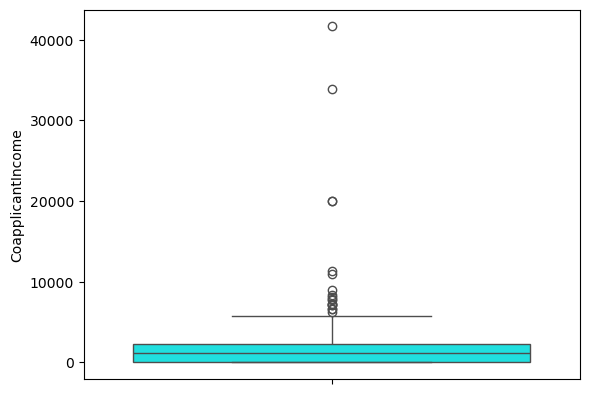

In [28]:
sns.boxplot(df['CoapplicantIncome'], color = 'cyan')

<Axes: xlabel='LoanAmount'>

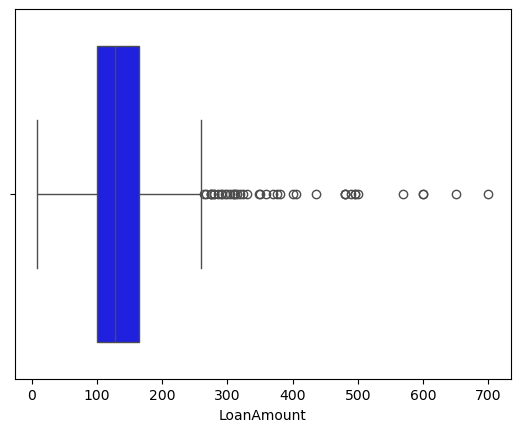

In [29]:
sns.boxplot(x=df['LoanAmount'], color = 'b')

# Now lets remove outliers in ApplicantIncome , Coapplicant Income and Loan Amount using IQR Method


In [31]:
# lower quantile
q1_ApplicantIncome = df['ApplicantIncome'].quantile(0.25)
# upper quntile 
q3_ApplicantIncome = df['ApplicantIncome'].quantile(0.75)
print('q1_ApplicantIncome is:', q1_ApplicantIncome)
print('q3_ApplicantIncome is:', q3_ApplicantIncome)

q1_ApplicantIncome is: 2877.5
q3_ApplicantIncome is: 5795.0


In [32]:
IQR = q3_ApplicantIncome - q1_ApplicantIncome
IQR

2917.5

In [33]:
# lower_limit
lower_ApplicantIncome = q1_ApplicantIncome - 1.5*(IQR)
# upper_limit
upper_ApplicantIncome = q3_ApplicantIncome + 1.5*(IQR)
print(lower_ApplicantIncome)
print(upper_ApplicantIncome)

-1498.75
10171.25


In [34]:
new_df = df[(df['ApplicantIncome'] <= upper_ApplicantIncome)]

# lets check for assurity how many outlier i am removing

In [35]:
print("Number of outliers:", df[df['ApplicantIncome'] > 10171.25].shape[0])

Number of outliers: 50


<Axes: ylabel='ApplicantIncome'>

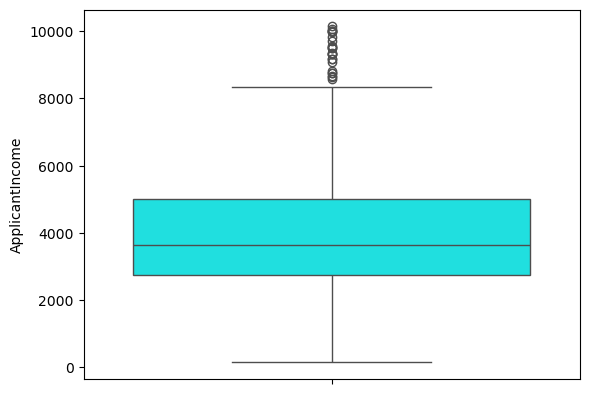

In [36]:
sns.boxplot(new_df['ApplicantIncome'], color = 'cyan')

# I am still getting outliers that means there is high skewness in the ApplicantIncome column

In [37]:
df['ApplicantIncome'].skew()              # very high skewness

6.539513113994625

# Now lets remove the outliers in the CoapplicantIncome column

In [39]:
# lower quantile
q1_CoapplicantIncome = df['CoapplicantIncome'].quantile(0.25)
# upper quntile 
q3_CoapplicantIncome = df['CoapplicantIncome'].quantile(0.75)
print('q1_CoapplicantIncome is:', q1_CoapplicantIncome)
print('q3_CopplicantIncome is:', q3_CoapplicantIncome)

q1_CoapplicantIncome is: 0.0
q3_CopplicantIncome is: 2297.25


In [40]:
IQR_2 = q3_CoapplicantIncome - q1_CoapplicantIncome
IQR_2

2297.25

In [41]:
# lower_limit
lower_CoapplicantIncome = q1_CoapplicantIncome - 1.5*(IQR)
# upper_limit
upper_CoapplicantIncome = q3_CoapplicantIncome + 1.5*(IQR)
print(lower_CoapplicantIncome)
print(upper_CoapplicantIncome)

-4376.25
6673.5


In [42]:
new_df1 = df[(df['CoapplicantIncome'] <= upper_CoapplicantIncome)]

<Axes: ylabel='CoapplicantIncome'>

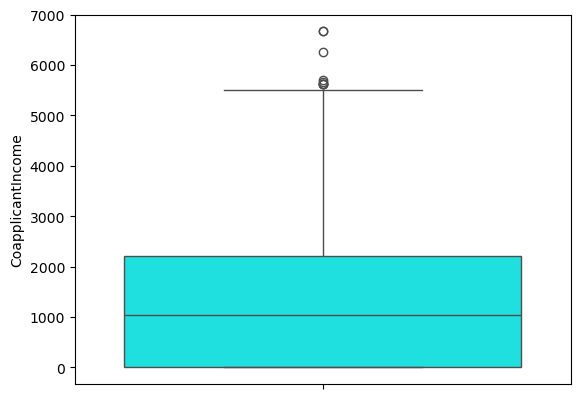

In [44]:
sns.boxplot(new_df1['CoapplicantIncome'], color = 'cyan')

# Some outliers are still there that there are chances that CoapplicantIncome Column has skewness

In [46]:
df['CoapplicantIncome'].skew()                          # very high skewness

7.491531216657306

# Now lets apply remove the outliers in the LoanAmount column

In [48]:
# lower quantile
q1_LoanAmount = df['LoanAmount'].quantile(0.25)
# upper quntile 
q3_LoanAmount = df['LoanAmount'].quantile(0.75)
print('q1_LoanAmount:', q1_LoanAmount)
print('q3_LoanAmount is:', q3_LoanAmount)

q1_LoanAmount: 100.25
q3_LoanAmount is: 164.75


In [49]:
IQR_LoanAmount = q3_LoanAmount - q1_LoanAmount
IQR_LoanAmount

64.5

In [50]:
# lower_limit
lower_LoanAmount_limit = q1_LoanAmount - 1.5*(IQR_LoanAmount)
# upper_limit
upper_LoanAmount_limit = q3_LoanAmount + 1.5*(IQR_LoanAmount)
print(lower_LoanAmount_limit)
print(upper_LoanAmount_limit)

3.5
261.5


In [51]:
new_df2 = df[(df['LoanAmount'] >= lower_LoanAmount_limit) & (df['LoanAmount'] <= upper_LoanAmount_limit)]


<Axes: ylabel='LoanAmount'>

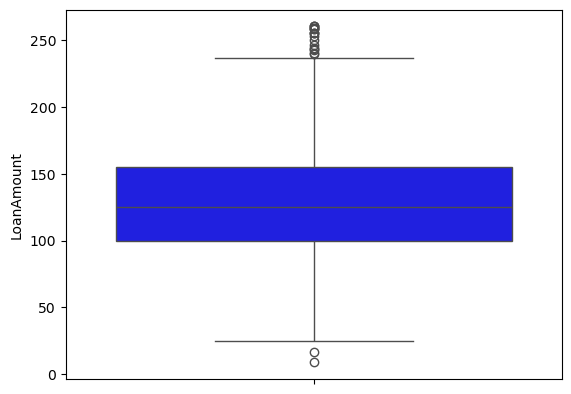

In [52]:
sns.boxplot(new_df2['LoanAmount'], color = 'b')

# Still some outliers left in the loan amount column. That means in this column too there are chances of skewness


In [54]:
df['LoanAmount'].skew()             # positively skewed

2.743052748820892

# lets make some visulaization to find distribution and trends in data after removing outliers


# Avg Loan Amount by self -employed status

In [190]:
avg_loan_by_Emp = new_df2.groupby('Self_Employed')['LoanAmount'].mean()
avg_loan_by_Emp

Self_Employed
NA     125.793103
No     126.819533
Yes    140.287671
Name: LoanAmount, dtype: float64

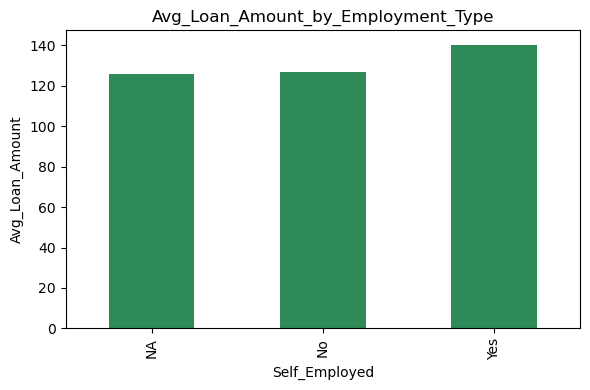

In [192]:
avg_loan_by_Emp.plot( kind = 'bar', color = 'seagreen', figsize = (6,4))
plt.title('Avg_Loan_Amount_by_Employment_Type')
plt.xlabel('Self_Employed')
plt.ylabel('Avg_Loan_Amount')
plt.tight_layout()
plt.show()

# insights from upper visualization - Self-employed people generally request or get larger loans.

# Loan approval rate by education

In [172]:

approval_rate = new_df.groupby('Education')['Loan_Status'].value_counts().reset_index(name='Count')
approval_rate

,Education,Loan_Status,Count
0,Graduate,Y,309
1,Graduate,N,123
2,Not Graduate,Y,80
3,Not Graduate,N,52


In [174]:
df['Education'].unique()


array(['Graduate', 'Not Graduate'], dtype=object)

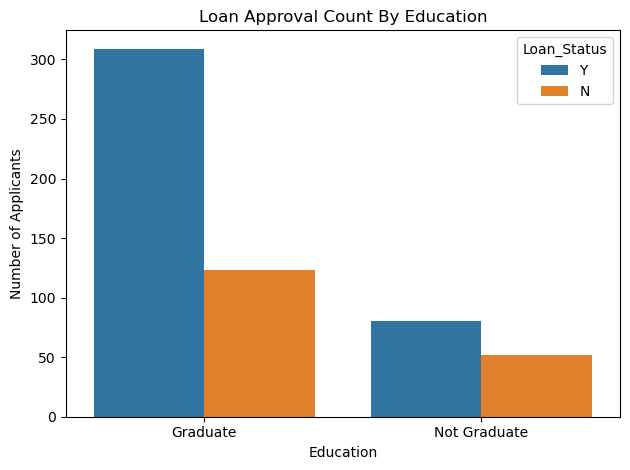

In [176]:
sns.barplot(data = approval_rate, x = 'Education', y='Count', hue='Loan_Status')

plt.title('Loan Approval Count By Education')
plt.xlabel('Education')
plt.ylabel('Number of Applicants')
plt.tight_layout()
plt.show()

# Insights from the upper barchart -- No. of applicants who got their loan approved are graduates while not graduate applicants has lower approvals

# Avg applicant income by loan_status

In [182]:
avg_applicant_income_loan_status = new_df.groupby('Loan_Status')['ApplicantIncome'].mean()
avg_applicant_income_loan_status

Loan_Status
N    4079.348571
Y    4145.136247
Name: ApplicantIncome, dtype: float64

In [184]:
# converting it to a datafame to create a barchart
df_avg_applicant_income_loan_status = avg_applicant_income_loan_status.reset_index(name = 'Avg Applicant Income')
df_avg_applicant_income_loan_status

,Loan_Status,Avg Applicant Income
0,N,4079.348571
1,Y,4145.136247


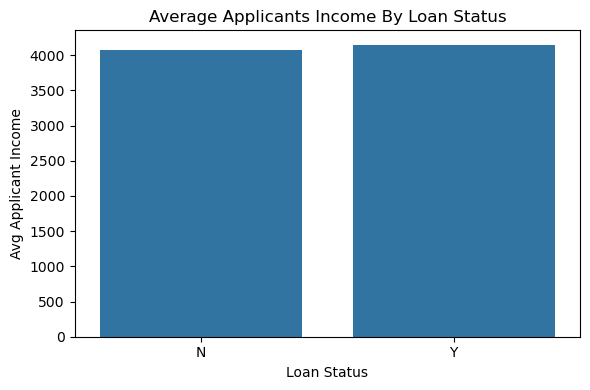

In [186]:
plt.figure(figsize = (6,4))
sns.barplot(data = df_avg_applicant_income_loan_status, x = 'Loan_Status', y ='Avg Applicant Income')
plt.xlabel('Loan Status')
plt.ylabel('Avg Applicant Income')
plt.title('Average Applicants Income By Loan Status')
plt.tight_layout()
plt.show()

# insights from the upper barchar --- Income may not play a significant role in loan decisions on its own as the difference is very low
# The decision might depend more on coapplicant income, loan amount, credit history, or property area.

# Lets visualize now Gender distribution

In [67]:

Gender_distribution = df['Gender'].value_counts()
Gender_distribution

Gender
Male       489
Female     112
Unknown     13
Name: count, dtype: int64

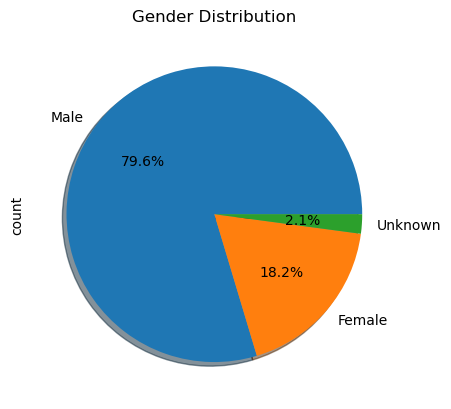

In [68]:
Gender_distribution.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, )
plt.title('Gender Distribution')
plt.show()



# Insigts from the pie chart -- Male applicants for loan are covering 80% of the applicants list

# lets create a countplot to check areaswise distribution of applicants

<Axes: xlabel='count', ylabel='Property_Area'>

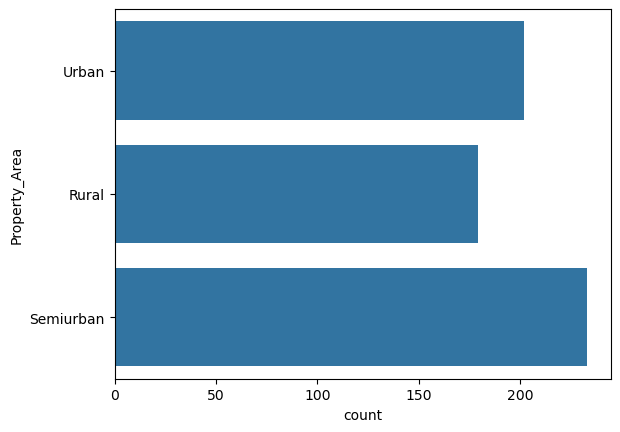

In [70]:
sns.countplot(df['Property_Area'])

# now lets deal with skewness in the ApplicantIncome, CoapplicantIncome and LoanAmount columns

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

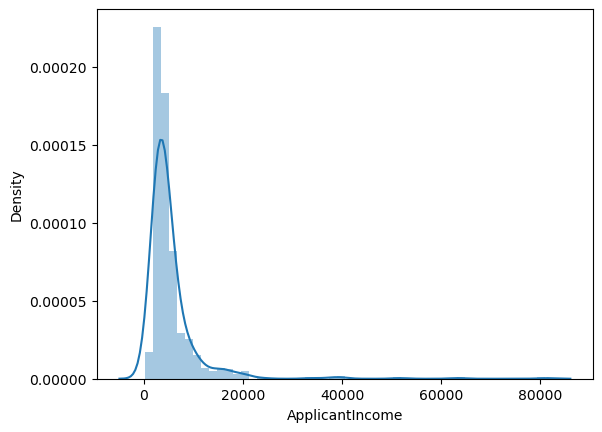

In [72]:
sns.distplot(df['ApplicantIncome'], kde = True)

# There is a long tail on the right side. That means data is Right Skewed(positively skewed) because most of the values are clustered to the left.


# Now lets reduce the skewness using log function in ApplicantIncome,CoapplicantIncome and LoanAmount

In [74]:
df['ApplicantIncome'] = np.log1p(df['ApplicantIncome'])

In [75]:
df['ApplicantIncome'].skew()

0.4821279953732817

In [76]:
df['CoapplicantIncome'].skew()

7.491531216657306

In [77]:
df['CoapplicantIncome']=np.log1p(df['CoapplicantIncome'])

In [78]:
df['CoapplicantIncome'].skew()

-0.17307327599230946

In [79]:
df['LoanAmount'].skew()

2.743052748820892

In [80]:
df['LoanAmount'] = np.log1p(df['LoanAmount'])
df['LoanAmount'].skew()

-0.15157750539614048

# Histplot after removing skewness in ApplicantIncome and LoanAmount shows the graph has become normally distributed bell shaped to some extent after removing skewness

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

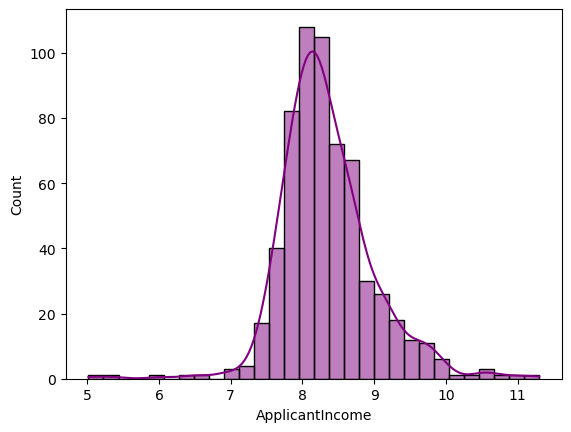

In [81]:
sns.histplot(df['ApplicantIncome'], bins = 30, kde=True, color = 'purple')


<Axes: xlabel='LoanAmount', ylabel='Count'>

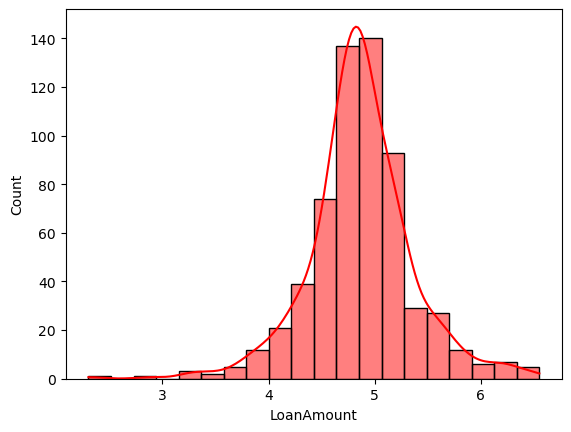

In [82]:
sns.histplot(df['LoanAmount'],bins = 20,  kde= True, color = 'red')